## importing the liberaries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# loding tge data set 
df= pd.read_excel("swiggy_data.xlsx")

In [3]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [4]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


## Meta Data

In [5]:
print("NO.of rows :",df.shape[0])
print("No.of columns :",df.shape[1])

NO.of rows : 197430
No.of columns : 10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


## DataTypes

In [7]:
df.dtypes

State                      object
City                       object
Order Date         datetime64[ns]
Restaurant Name            object
Location                   object
Category                   object
Dish Name                  object
Price (INR)               float64
Rating                    float64
Rating Count                int64
dtype: object

In [8]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


## Null values check

In [9]:
df.isna().sum()

State              0
City               0
Order Date         0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64

# KPI's

### Total sales

In [10]:
total_sales=df["Price (INR)"].sum()

print("Total Sales (INR):",round(total_sales,2))

Total Sales (INR): 53012505.77


### Average Rating

In [11]:
average_ratting=df["Rating"].mean()

print("Average Ratting for Swiggy:",round(average_ratting,1))

Average Ratting for Swiggy: 4.3


### Average Order Value

In [12]:
average_order_value=df["Price (INR)"].mean()

print("Average Order Value for Order:",round(average_order_value,2))

Average Order Value for Order: 268.51


### Ratting Count's

In [16]:
rating_counts=df["Rating Count"].sum()

print("Total Rating Counts:",ratting_counts)

Total Rating Counts: 5591574


### Total Orders

In [17]:
total_orders=len(df)

print("Total Orders:",total_orders)

Total Orders: 197430


# Charts

### Monthly Sales Treand

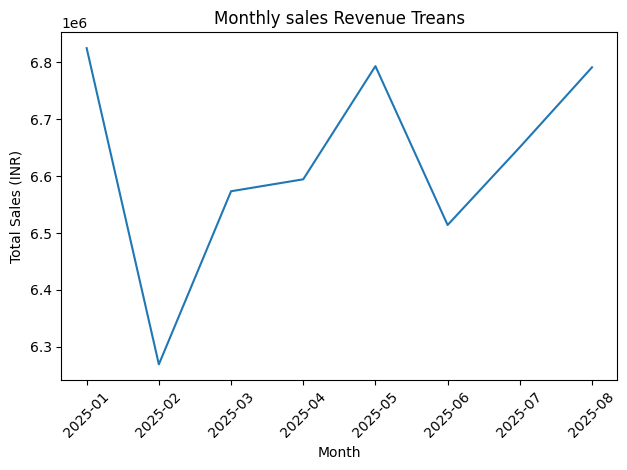

In [19]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["Year Month"] = df["Order Date"].dt.to_period("M").astype(str)

monthly_revenue = df.groupby("Year Month")["Price (INR)"].sum().reset_index()


plt.figure()
plt.plot(monthly_revenue["Year Month"],monthly_revenue["Price (INR)"])
plt.xticks(rotation=45)
plt.xlabel("Month")

plt.ylabel("Total Sales (INR)")
plt.title("Monthly sales Revenue Treans")
plt.tight_layout()
plt.show()

### Daily Sales Treand

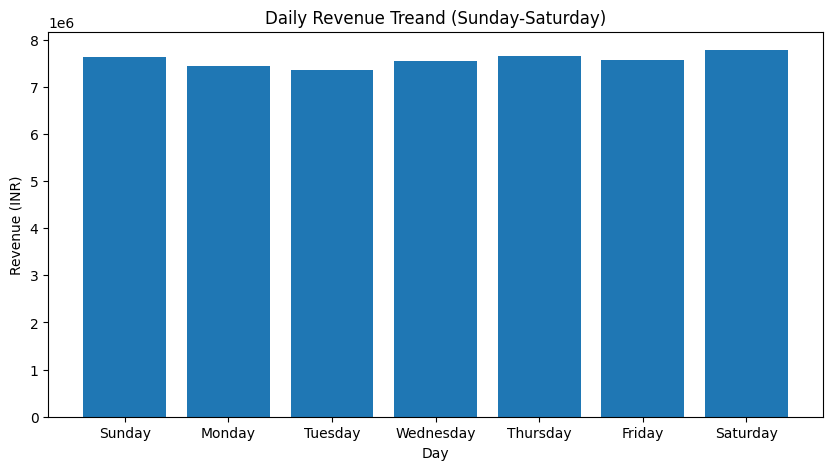

In [20]:
df["Day Name"] = pd.to_datetime(df["Order Date"]).dt.day_name()

daily_revenue = df.groupby("Day Name")["Price (INR)"].sum().reindex(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])


plt.figure(figsize=(10,5))
plt.bar(daily_revenue.index,daily_revenue.values)
plt.title("Daily Revenue Treand (Sunday-Saturday)")
plt.xlabel("Day")

plt.ylabel("Revenue (INR)")
plt.show()

### Total Sales by Food Type (Veg and Non-Veg)

In [21]:
non_veg_keywords = ["chicken","egg","fish","mutton","prawn","biryani","kabab","kebab","non-veg","non veg"]

df["Food Category"] = np.where(df["Dish Name"].str.lower().str.contains("|".join(non_veg_keywords),na=False),"Non-Veg","Veg")

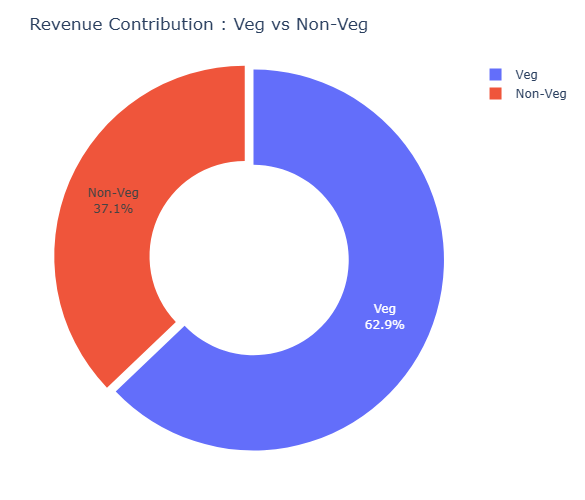

In [22]:
food_revenue = df.groupby("Food Category")["Price (INR)"].sum().reset_index()


fig= px.pie(food_revenue,
            values = "Price (INR)",
            names = "Food Category",
            hole =0.5,
            title = "Revenue Contribution : Veg vs Non-Veg"
           )

fig.update_traces(textinfo="percent+label",
                  pull=[0.05,0]
                 )

fig.update_layout(
    height=500,
    margin=dict(t=60,b=40,l=40,r=40)
)
fig.show()


### Total Sales By State


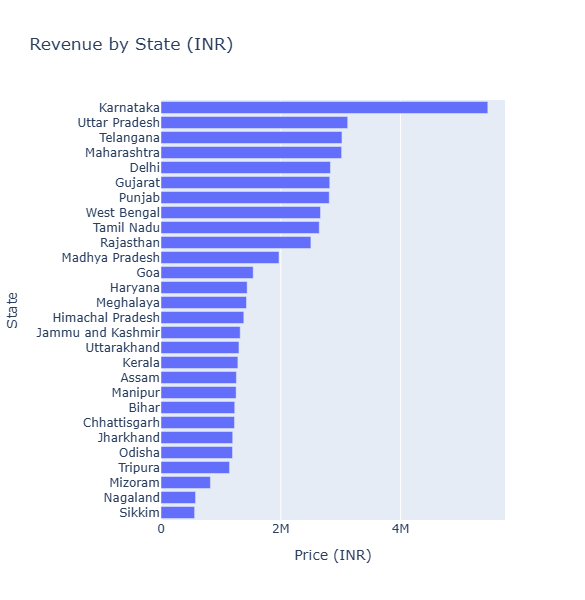

In [23]:
fig = px.bar(
    df.groupby("State",as_index= False)["Price (INR)"].sum().sort_values("Price (INR)",ascending=False),
    x="Price (INR)",
    y="State",
    orientation="h",
    title="Revenue by State (INR)"
)
fig.update_layout(height=600,yaxis=dict(autorange="reversed"))
fig.show()

### Quaterly Performance Summary

In [24]:
df["Order_Date"]=pd.to_datetime(df["Order Date"])
df["Quater"]=df["Order Date"].dt.to_period("Q").astype(str)

quaterly_summary=(df.groupby("Quater",as_index=False).agg(Total_Sales=("Price (INR)","sum"),
                                                        Avg_Ratting=("Rating","mean"),
                                                        Total_Orders=("Order_Date","count")).sort_values("Quater")
)

quaterly_summary["Total_Sales"]=quaterly_summary["Total_Sales"].round(0)
quaterly_summary["Avg_Ratting"]=quaterly_summary["Avg_Ratting"].round(2)

quaterly_summary

,Quater,Total_Sales,Avg_Ratting,Total_Orders
0,2025Q1,19667822.0,4.34,73096
1,2025Q2,19902257.0,4.34,74163
2,2025Q3,13442427.0,4.34,50171


### Top 5 Cities by Sales

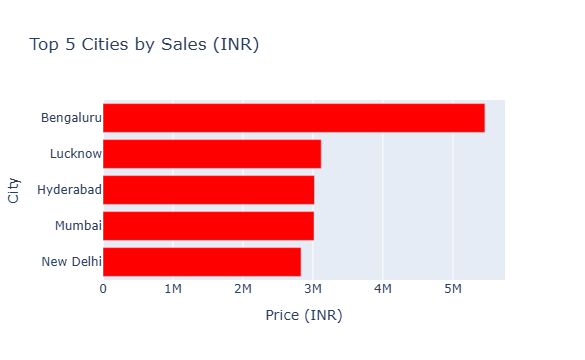

In [25]:
top_5=(df.groupby("City")["Price (INR)"].sum().nlargest(5).sort_values().reset_index())

fig=px.bar(top_5,
           x="Price (INR)",
           y="City",
           orientation="h",
           title="Top 5 Cities by Sales (INR)",
           color_discrete_sequence=["red"]
)
fig.show()


### Restorent Ratings


In [34]:
top_restorents = (
    df.groupby(["Restaurant Name", "Location"], as_index=False)["Rating"].mean().round(1).sort_values(by="Rating", ascending=False)
)

top_restorents.head(10)


,Restaurant Name,Location,Rating
2028,Theobroma,South Bopal,4.9
1283,Natural Ice Cream,crossing republic,4.9
1599,Sakana,Vagator,4.8
997,Kwality Walls Ice Cream and More,Rajarhat,4.8
847,Jagannath Mandir Arna Prasad,Pandaba Nagar,4.8
1263,NIC Ice Creams,Hatia,4.8
719,Grameen Kulfi,Behala,4.8
731,Grameen Kulfi,Vasco Da Gama,4.8
965,Keventers - Milkshakes & Desserts,Laitumkhrah,4.8
725,Grameen Kulfi,Lake Town,4.8
